## Observations and Insights 

# Three observations or inferences made from the data


1. blahblah

2. blahblah

3. blahblah


In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (on 'Mouse ID')

mouse_study_merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_study_merged_df.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [88]:
# Checking the number of mice.
num_mice_df = mouse_study_merged_df['Mouse ID'].nunique()
num_mice_df

249

In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicaterows_mice_time_df = mouse_study_merged_df[mouse_study_merged_df.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicated rows based on Mouse ID and Timepoint columns are: ", duplicaterows_mice_time_df, sep='\n')

Duplicated rows based on Mouse ID and Timepoint columns are: 
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicaterows_mice_df = mouse_study_merged_df[mouse_study_merged_df.duplicated(['Mouse ID'])]
print("Duplicated rows based on the Mouse ID column are: ", duplicaterows_mice_df, sep='\n')

Duplicated rows based on the Mouse ID column are: 
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
5        k403     Ramicane  Male          21          16         25   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1              38.825898                 0  
2     

In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_study_df = mouse_study_merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
# Checking the number of mice in the clean DataFrame.

num_clean_mice_df = clean_mouse_study_df['Mouse ID'].nunique()
num_clean_mice_df

249

## Summary Statistics

In [96]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drug_regimen_df = clean_mouse_study_df.groupby(['Drug Regimen'])
# drug_regimen_df.median()

## mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean_df = drug_regimen_df['Tumor Volume (mm3)'].mean()
# tumor_mean_df
tumor_median_df = drug_regimen_df['Tumor Volume (mm3)'].median()
# tumor_median_df
tumor_variance_df = drug_regimen_df['Tumor Volume (mm3)'].var()
# tumor_variance_df
tumor_std_dev_df = drug_regimen_df['Tumor Volume (mm3)'].std()
# tumor_std_dev_df
tumor_sem_df = drug_regimen_df['Tumor Volume (mm3)'].sem()
# tumor_sem_df

## Assemble the resulting series into a single summary dataframe.

stats_summary_tumor_vol_df = pd.DataFrame({"Mean (tumor vol)" : tumor_mean_df, "Median (tumor vol)" : tumor_median_df,
                                 "Variance (tumor vol)" : tumor_variance_df, "Standard Deviation (tumor vol)" : tumor_std_dev_df,
                                "Std Error of Mean (tumor vol)" : tumor_sem_df})
stats_summary_tumor_vol_df


,Mean (tumor vol),Median (tumor vol),Variance (tumor vol),Standard Deviation (tumor vol),Std Error of Mean (tumor vol)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

tumor_vol_df = drug_regimen_df['Tumor Volume (mm3)']
# tumor_vol_df.mean()
agg_tumor_vol_stats_df = tumor_vol_df.agg(['mean', 'median', 'var', 'std', 'sem'])
agg_tumor_vol_stats_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [163]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Put drug regimen and number of timepoints into a dataframe and reset the index so drug regimen is in a column
timepoints_df = drug_regimen_df['Timepoint']
total_timepoints_df = timepoints_df.count()

timepoints_per_regimen_df = pd.DataFrame(total_timepoints_df)
timepoints_per_regimen_df

drug_regimen_timepoints_df = timepoints_per_regimen_df.reset_index()
drug_regimen_timepoints_df

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


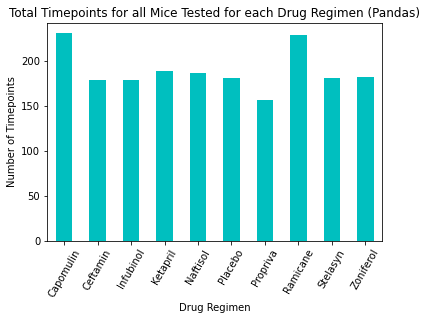

In [181]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_timepoints_df.plot(kind="bar", x="Drug Regimen", y="Timepoint", rot=60, color='c',
                                                  title="Total Timepoints for all Mice Tested for each Drug Regimen (Pandas)",
                                                  legend="", ylabel="Number of Timepoints");


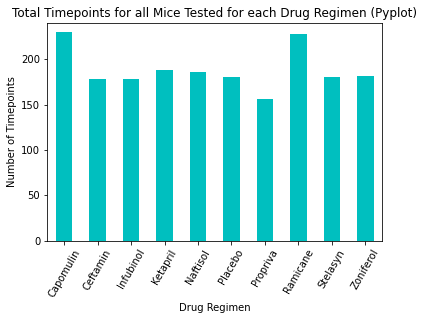

In [190]:
## Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_timepoints_df))
ticklocations = [value for value in x_axis]

# Set plot parameters
plt.figure(figsize=(6,4))

plt.bar(x_axis, drug_regimen_timepoints_df["Timepoint"], width=0.5, color='c', alpha=1, align="center")
plt.xticks(ticklocations, drug_regimen_timepoints_df["Drug Regimen"], rotation="60")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(drug_regimen_timepoints_df["Timepoint"])+10)

# Set a title and labels
plt.title("Total Timepoints for all Mice Tested for each Drug Regimen (Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints");

In [131]:
## Generate a pie plot showing the distribution of female versus male mice

# Put male and female count data into a dataframe and reset the index
male_fem_df = clean_mouse_study_df.groupby('Sex')
sex_count_df = male_fem_df.count()
mvf_df = sex_count_df['Mouse ID']
distrib_mvf_df = pd.DataFrame(mvf_df)
male_female_df = distrib_mvf_df.reset_index()
male_female_df

,Sex,Mouse ID
0,Female,930
1,Male,958


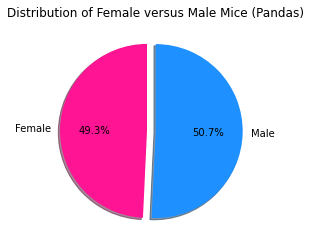

In [168]:
## Generate a pie plot showing the distribution of female versus male mice using Pandas

pandas_pie_plot = male_female_df.plot(kind="pie", y='Mouse ID', explode = (0.1, 0), labels = (male_female_df["Sex"]),
                                      colors = ["deeppink", "dodgerblue"], autopct="%1.1f%%", shadow=True, startangle=90, 
                                      title=("Distribution of Female versus Male Mice (Pandas)"), ylabel=(""), legend=(""))

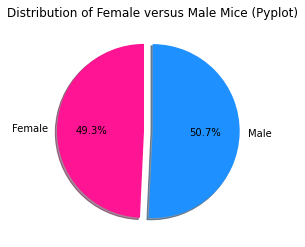

In [165]:
## Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set pie chart labels
labels = (male_female_df["Sex"])

# Set the value of each section of the pie chart
sizes = (male_female_df["Mouse ID"])

# Set the colours of each section of the pie chart
colors = ["deeppink", "dodgerblue"]

# Separate the sections of the pie chart
explode = (0.1, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels = labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Female versus Male Mice (Pyplot)");

## Quartiles, Outliers and Boxplots

In [303]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
each_mouse_df = clean_mouse_study_df.groupby("Mouse ID")

max_timepoint_mouse_df = pd.DataFrame(each_mouse_df['Timepoint'].max())
max_timepoint_mouse_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

clean_mouse_indexed_df = clean_mouse_study_df.set_index('Mouse ID')
clean_mouse_indexed_df

tumor_vol_max_timepoint_df = clean_mouse_indexed_df.merge(max_timepoint_mouse_df, on=['Mouse ID','Timepoint'])
tumor_vol_max_timepoint_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
z314,Stelasyn,Female,21,28,5,45.934712,0
z435,Propriva,Female,12,26,10,48.710661,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [323]:
tumor_timepoint_reindexed_df = tumor_vol_max_timepoint_df.reset_index()
tumor_timepoint_reindexed_df
tumor_timepoint_soted_df = tumor_timepoint_reindexed_df.sort_values('Drug Regimen')
tumor_timepoint_soted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,b742,Capomulin,Male,7,21,45,38.939633,0
45,i557,Capomulin,Female,1,24,45,47.685963,1
40,r944,Capomulin,Male,12,25,45,41.581521,2
39,l509,Capomulin,Male,17,21,45,41.483008,3
38,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
84,d133,Zoniferol,Male,5,30,0,45.000000,0
154,n967,Zoniferol,Male,11,27,15,49.825004,1
85,d164,Zoniferol,Male,21,28,10,47.474645,1
143,m331,Zoniferol,Female,19,26,15,52.110088,1


In [324]:
tumor_timepoint_soted_df['Mouse ID'].nunique()

249

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
